I have decided to stack all the available void together, because the sbr does not depend much
on the void size

First I am goint to plot again the entire low-high range of sizes in order to see which is the 
range we can use for the final result

Then I am going to reduce the range of sizes to the founded in last paragraph and compute again the total, low and high concentration with the same range for both the median and the mean cases.

In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import splrep, splev
from scipy.signal import savgol_filter

from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

from scipy.misc import derivative


### all the halos defined by the 200m overdensity criteria (already isolated)

In [343]:
# all: mean 200 with 50 radial bins between 0.2 and 5
ol = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_halos_512x256_03.txt")
o6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_halos_512x256_03.txt")
o5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_halos_512x256_03.txt")
o4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_halos_512x256_03.txt")
oA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_halos_512x256_03.txt")
oB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_halos_512x256_03.txt")
oD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_halos_512x256_03.txt")

In [344]:
# all: mean 200 with 50 radial bins between 0.2 and 5, low concentration
ohl = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_lowc_halos_512x256_03.txt")
oh6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_lowc_halos_512x256_03.txt")
oh5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_lowc_halos_512x256_03.txt")
oh4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_lowc_halos_512x256_03.txt")
ohA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_lowc_halos_512x256_03.txt")
ohB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_lowc_halos_512x256_03.txt")
ohD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_lowc_halos_512x256_03.txt")

In [345]:
# all: mean 200 with 50 radial bins between 0.2 and 5, high concentration
oll = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_highc_halos_512x256_03.txt")
ol6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_highc_halos_512x256_03.txt")
ol5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_highc_halos_512x256_03.txt")
ol4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_highc_halos_512x256_03.txt")
olA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_highc_halos_512x256_03.txt")
olB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_highc_halos_512x256_03.txt")
olD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_highc_halos_512x256_03.txt")

In [346]:
# all: median 200 with 50 radial bins between 0.2 and 5
oml = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_m_halos_512x256_03.txt")
om6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_m_halos_512x256_03.txt")
om5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_m_halos_512x256_03.txt")
om4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_m_halos_512x256_03.txt")
omA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_m_halos_512x256_03.txt")
omB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_m_halos_512x256_03.txt")
omD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_m_halos_512x256_03.txt")

In [347]:
# all: median 200 with 50 radial bins between 0.2 and 5, low concentration
omhl = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_m_lowc_halos_512x256_03.txt")
omh6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_m_lowc_halos_512x256_03.txt")
omh5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_m_lowc_halos_512x256_03.txt")
omh4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_m_lowc_halos_512x256_03.txt")
omhA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_m_lowc_halos_512x256_03.txt")
omhB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_m_lowc_halos_512x256_03.txt")
omhD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_m_lowc_halos_512x256_03.txt")

In [348]:
# all: median 200 with 50 radial bins between 0.2 and 5, high concentration
omll = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_m_highc_halos_512x256_03.txt")
oml6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_m_highc_halos_512x256_03.txt")
oml5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_m_highc_halos_512x256_03.txt")
oml4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_m_highc_halos_512x256_03.txt")
omlA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_m_highc_halos_512x256_03.txt")
omlB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_m_highc_halos_512x256_03.txt")
omlD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_m_highc_halos_512x256_03.txt")

### isolated halos defined by the virial fof criteria of rockstar

In [349]:
# mean rockstar virial
il = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_halos.list")
i6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_halos.list")
i5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_halos.list")
i4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_halos.list")
iA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_halos.list")
iB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_halos.list")
iD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_halos.list")

In [350]:
# mean rockstar virial low concentratin
ill = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_lowc_halos.list")
il6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_lowc_halos.list")
il5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_lowc_halos.list")
il4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_lowc_halos.list")
ilA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_lowc_halos.list")
ilB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_lowc_halos.list")
ilD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_lowc_halos.list")

In [351]:
# mean rockstar virial high concentration
ihl = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_highc_halos.list")
ih6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_highc_halos.list")
ih5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_highc_halos.list")
ih4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_highc_halos.list")
ihA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_highc_halos.list")
ihB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_highc_halos.list")
ihD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_highc_halos.list")

In [352]:
# median rockstar virial
iml = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_m_halos.list")
im6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_m_halos.list")
im5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_m_halos.list")
im4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_m_halos.list")
imA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_m_halos.list")
imB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_m_halos.list")
imD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_m_halos.list")

In [353]:
# median rockstar virial low concentratin
imll = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_m_lowc_halos.list")
iml6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_m_lowc_halos.list")
iml5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_m_lowc_halos.list")
iml4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_m_lowc_halos.list")
imlA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_m_lowc_halos.list")
imlB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_m_lowc_halos.list")
imlD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_m_lowc_halos.list")

In [354]:
# median rockstar virial high concentration
imhl = np.genfromtxt("/home/cosmousp/Documentos/halos/l/densidad_m_highc_halos.list")
imh6 = np.genfromtxt("/home/cosmousp/Documentos/halos/6/densidad_m_highc_halos.list")
imh5 = np.genfromtxt("/home/cosmousp/Documentos/halos/5/densidad_m_highc_halos.list")
imh4 = np.genfromtxt("/home/cosmousp/Documentos/halos/4/densidad_m_highc_halos.list")
imhA = np.genfromtxt("/home/cosmousp/Documentos/halos/A/densidad_m_highc_halos.list")
imhB = np.genfromtxt("/home/cosmousp/Documentos/halos/B/densidad_m_highc_halos.list")
imhD = np.genfromtxt("/home/cosmousp/Documentos/halos/D/densidad_m_highc_halos.list")

## Smoothing the data by using Savgol filter

Right now we are applying twise the Savitzky–Golay filter. Both with a 25 neighbor window, but once with a fourth order polinomial fit while the second time using a third order plinomial fit. That avoid small sacale oscilations that remain when using the filter only once.

In [322]:
def smooth(data):
    for i in range(0,int((len(data[0,:])-2)/4)):
        y=data[:,i*2+1]
        data[:,i*2+1]=y = savgol_filter(y, 15, 3)
    for i in range(0,int((len(data[0,:])-2)/4)):
        y=data[:,i*2+1]
        data[:,i*2+1]=y = savgol_filter(y, 15, 4)

In [355]:
smooth(ol)
smooth(o6)
smooth(o5)
smooth(o4)
smooth(oA)
smooth(oB)
smooth(oD)

In [356]:
smooth(oll)
smooth(ol6)
smooth(ol5)
smooth(ol4)
smooth(olA)
smooth(olB)
smooth(olD)

In [357]:
smooth(ohl)
smooth(oh6)
smooth(oh5)
smooth(oh4)
smooth(ohA)
smooth(ohB)
smooth(ohD)

In [358]:
smooth(oml)
smooth(om6)
smooth(om5)
smooth(om4)
smooth(omA)
smooth(omB)
smooth(omD)

In [359]:
smooth(omll)
smooth(oml6)
smooth(oml5)
smooth(oml4)
smooth(omlA)
smooth(omlB)
smooth(omlD)

In [360]:
smooth(omhl)
smooth(omh6)
smooth(omh5)
smooth(omh4)
smooth(omhA)
smooth(omhB)
smooth(omhD)

In [361]:
smooth(il)
smooth(i6)
smooth(i5)
smooth(i4)
smooth(iA)
smooth(iB)
smooth(iD)

In [362]:
smooth(ill)
smooth(il6)
smooth(il5)
smooth(il4)
smooth(ilA)
smooth(ilB)
smooth(ilD)

In [363]:
smooth(ihl)
smooth(ih6)
smooth(ih5)
smooth(ih4)
smooth(ihA)
smooth(ihB)
smooth(ihD)

In [364]:
smooth(iml)
smooth(im6)
smooth(im5)
smooth(im4)
smooth(imA)
smooth(imB)
smooth(imD)

In [365]:
smooth(imll)
smooth(iml6)
smooth(iml5)
smooth(iml4)
smooth(imlA)
smooth(imlB)
smooth(imlD)

In [366]:
smooth(imhl)
smooth(imh6)
smooth(imh5)
smooth(imh4)
smooth(imhA)
smooth(imhB)
smooth(imhD)

## Plotting the logder of the smoothed data by interpolating it

The data was already smooted by applying the Savgol filter 15 4

Then the data is interpolateed by using cubicspline

Finally we compute its log derivative

## Plotting the density profile for different bins of a given dataset

In [469]:
def grafica(data1,t1,data2,t2):
    fig, ax = plt.subplots(1,2,figsize=(19, 5))
    ax[0].set_xlim(0.2, 5)
    ax[0].set_ylim(0.5, 2000)
    ax[0].set_title(t1)
    ax[1].set_xlim(0.2, 5)
    ax[1].set_ylim(0.5, 2000)
    ax[1].set_title(t2)
    for i in range(0,int((len(data1[0,:])-2)/4)):
        ax[0].loglog(data1[:,0],data1[:,2*i+1], label='bin'+str(i))
    for i in range(0,int((len(data2[0,:])-2)/4)):
        ax[1].loglog(data2[:,0],data2[:,2*i+1], label='bin'+str(i))
    plt.legend(loc=0)
    plt.show()
    
    
def grafica(data1,data2,data3,t1,data4,data5,data6,t2,bottom,top):
    fig, ax = plt.subplots(1,2,figsize=(20, 10))
    ax[0].set_xlim(0.2, 5)
    ax[0].set_ylim(bottom, top)
    ax[0].set_title(t1)
    ax[1].set_xlim(0.2, 5)
    ax[1].set_ylim(bottom, top)
    ax[1].set_title(t2)
    ax[0].set(ylabel=r'$\xi$',xlabel=r'$r/r_{200}$')
    ax[1].set(ylabel=r'$\xi$',xlabel=r'$r/r_{vir}$')
    for i in range(0,int((len(data1[0,:])-2)/4)):
        ax[0].loglog(data1[:,0],data1[:,2*i+1], label='bin'+str(i))
        ax[0].loglog(data2[:,0],data2[:,2*i+1], label='bin'+str(i))
        ax[0].loglog(data3[:,0],data3[:,2*i+1], label='bin'+str(i))
    for i in range(0,int((len(data2[0,:])-2)/4)):
        ax[1].loglog(data4[:,0],data4[:,2*i+1], label='all')
        ax[1].loglog(data5[:,0],data5[:,2*i+1], label='low concentration')
        ax[1].loglog(data6[:,0],data6[:,2*i+1], label='high concentration')
    plt.legend(loc=0)
    plt.show()

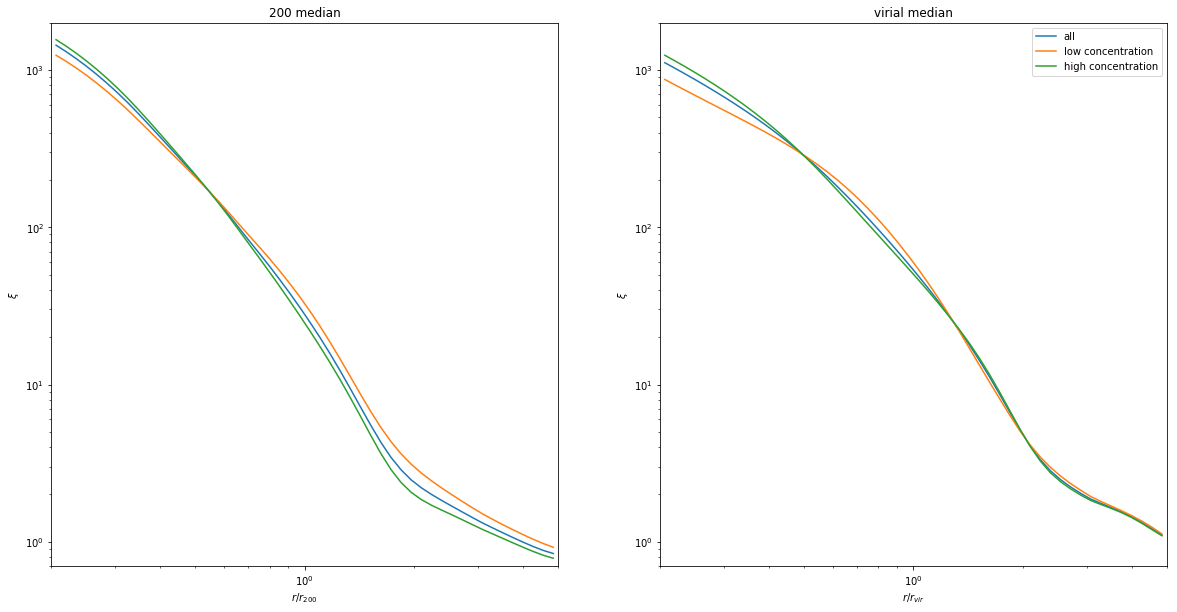

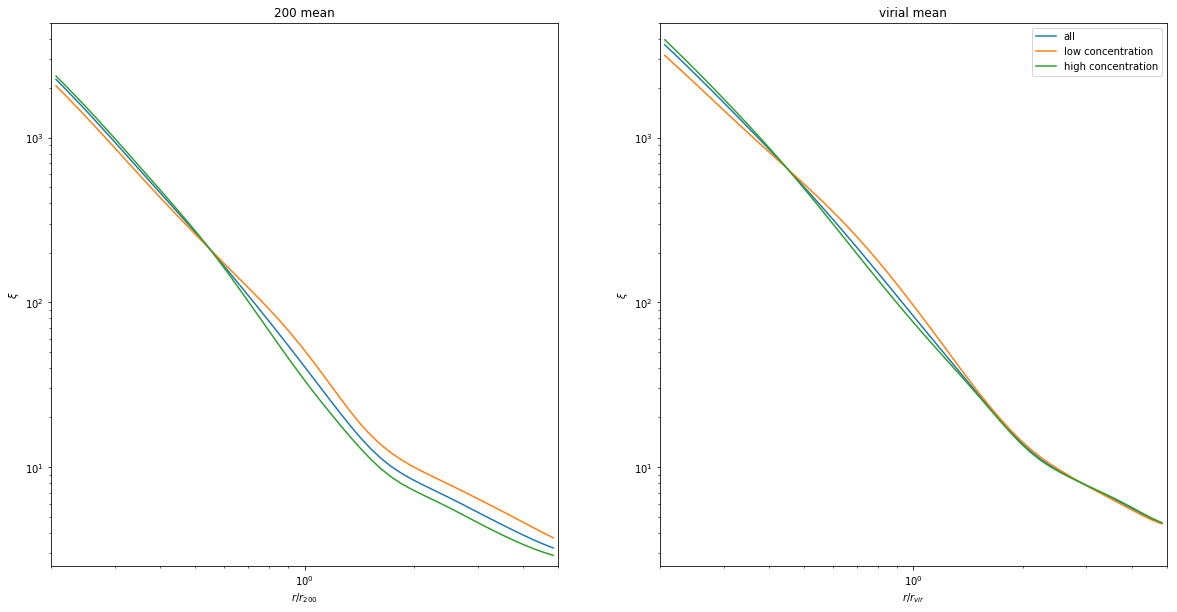

In [474]:
#grafica(ol,'200 mean',il,'virial mean')
#grafica(oml,'200 median',iml,'virial median')
#grafica(omll,'200 median low c',imll,'virial median low c')
#grafica(omhl,'200 median high c',imhl,'virial median high c')
grafica(oml,omll,omhl,'200 median',iml,imll,imhl,'virial median',0.7,2000)
grafica(ol,oll,ohl,'200 mean',il,ill,ihl,'virial mean',2.5,5000)

### Plotting several bins for a given dataset

In [76]:
# plot from bin_keft to bin_right for a fiven dataset
# data   bin_left   bin_right    neigbors    smooth_degree
def grafica2(data,a,b,title):
    fig, ax = plt.subplots()
    ax.set_xlim(0.2, 4)
    ax.set_ylim(-4.5, -0.5)
    xs = np.linspace(0.2, 4, 5000)
    for i in range(a,b):
        #plt.semilogx(data[:,0], splev(data[:,0],splrep(data[:,0],data[:,2*i+1],k=k0,s=s0),der=1)*data[:,0]/splev(data[:,0],splrep(data[:,0],data[:,2*i+1],k=k0,s=s0)), label=i)
        #plt.semilogx(xs, splev(xs,splrep(data[:,0],data[:,2*i+1],k=k0,s=s0),der=1)*xs/splev(xs,splrep(data[:,0],data[:,2*i+1],k=k0,s=s0)), label=i)
        x=data[:,0]
        y=data[:,2*i+1]
        cs=CubicSpline(x,y)
        der=cs.derivative()
        plt.semilogx(xs,der(xs)*xs/cs(xs), label=i)
    plt.legend(loc=0)
    plt.title(title)
    plt.show()

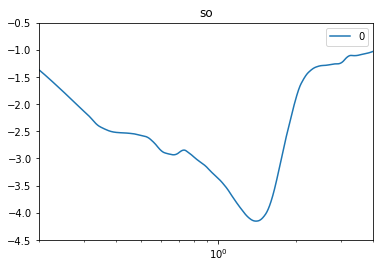

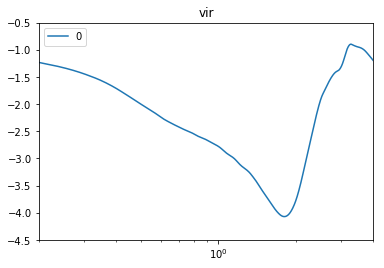

In [380]:
# using only 4 stacks and 20 bins (0.1,10)
# when fiducial is 8 stacks and 50 bins (0.2,5)
grafica2(oml,0,1,'so')
grafica2(iml,0,1,'vir')

### Plotting the same bin for different datasets

In [79]:
# different panels correspond to 200_mean virial_mean 200_median virial_median
# in each panel we compare a single bin among 4 datasets (lcdm fr6 fr5 fr4 for example)
from __future__ import unicode_literals
def grafica3(t1,x1,d1,d2,d3,d4,t2,x2,d5,d6,d7,d8,t3,x3,d9,d10,d11,d12,t4,x4,d13,d14,d15,d16,MG,bb,lim):
    titles=[t1,t2,t3,t4]
    xline=[x1,x2,x3,x4]
    if MG == 0:
        names=['l','6','5','4']
    else:
        names=['l','A','B','D']
    d=np.concatenate((d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16),axis=1)
    sd=len(d1[0,:])#data_size
    b=bb*2+1
    fig, ax = plt.subplots(1,4,figsize=(19, 5), sharey=True)
    fig.suptitle("bin"+str(bb))
    xs = np.linspace(0.2, 5, 5000)

    for a in ax.flat:
        a.set(ylabel=r'$ d \ln \xi / d \ln r$',xlabel=r'$r/r_h$')
    for a in ax.flat:
        a.label_outer()
    for i in range(0,4):
        ax[i].set_ylim(lim, -0.5)
        x=d[:,0+4*i*sd]
        cs1 = CubicSpline(x,d[:,b+4*i*sd])
        cs2 = CubicSpline(x,d[:,b+sd+4*i*sd])
        cs3 = CubicSpline(x,d[:,b+2*sd+4*i*sd])
        cs4 = CubicSpline(x,d[:,b+3*sd+4*i*sd])
        dr1 = cs1.derivative()
        dr2 = cs2.derivative()
        dr3 = cs3.derivative()
        dr4 = cs4.derivative()
        ax[i].semilogx(xs, dr1(xs)*xs/cs1(xs), label=names[0])
        ax[i].semilogx(xs, dr2(xs)*xs/cs2(xs), label=names[1])
        ax[i].semilogx(xs, dr3(xs)*xs/cs3(xs), label=names[2])
        ax[i].semilogx(xs, dr4(xs)*xs/cs4(xs), label=names[3])
        ax[i].set_title(titles[i])
        ax[i].axvline(x=xline[i])
    plt.legend(loc=0)
    plt.show()

# f(R)

### I) spherical overdensity

1) The angular median of the profile can really extract better information aboout the sphash-bach feature. The angular median of the individual profiles is meant to erase the noise of the halo profile due to substructures.

2) The angular median destroy the small voids information, it hapens because we are using 50 radial bins and 48 angular bins, meaning than we need minimum of a some multiples of 2500 particles to trace propertly the density profile

3) Splitting the total sample into low and high concentration does not add much information

### I) Virial

1) The angular median of the profile (

2) The angular median (

3) Splitting the total sample into low and high concentration (

### II) Virial Vs SO

1) The virial version show a more monotonic behaviour of the splashback feature

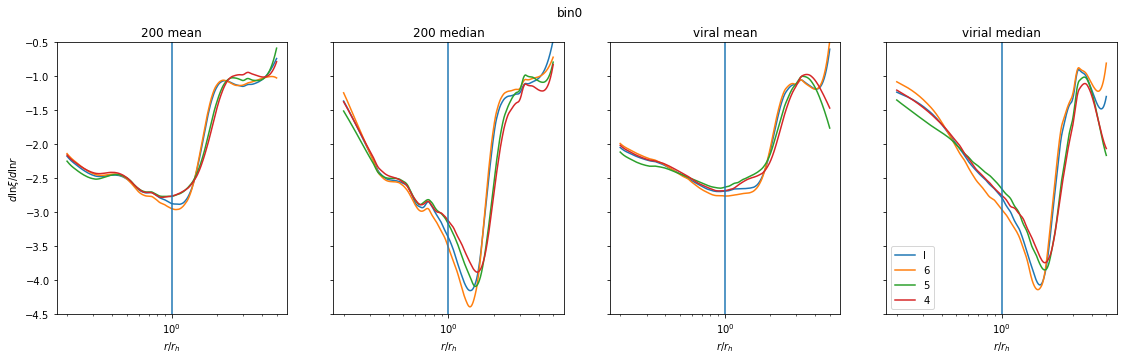

In [368]:
grafica3('200 mean',1,ol,o6,o5,o4,'200 median',1,oml,om6,om5,om4,'viral mean',1,il,i6,i5,i4,'virial median',1,iml,im6,im5,im4,0,0,-4.5)

In [421]:
# different panels correspond to 200_mean virial_mean 200_median virial_median
# in each panel we compare a single bin among 4 datasets (lcdm fr6 fr5 fr4 for example)
from __future__ import unicode_literals
def grafica4(t1,x1,d1,d2,d3,d4,t2,x2,d5,d6,d7,d8,t3,x3,d9,d10,d11,d12,MG,bb,left,right,top,bottom,virial,x_0):
    titles=[t1,t2,t3]
    xline=[x1,x2,x3]
    if MG == 0:
        names=['l','6','5','4']
        titulo='f(R)'
    else:
        names=['l','A','B','D']
        titulo='symmetron'
    if virial==1:
        xl=r'$r/r_{vir}$'
    else:
        xl=r'$r/r_{200}$'
    d=np.concatenate((d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12),axis=1)
    sd=len(d1[0,:])#data_size
    b=bb*2+1
    fig, ax = plt.subplots(1,3,figsize=(19, 5), sharey=True)
    fig.suptitle(titulo)
    xs = np.linspace(0.2, 5, 5000)
    min1t=min2t=min3t=min4t=1.

    for a in ax.flat:
        a.set(ylabel=r'$ d \ln \xi / d \ln r$',xlabel=xl)
    for a in ax.flat:
        a.label_outer()
    for i in range(0,3):
        ax[i].set_ylim(top, bottom)
        ax[i].set_xlim(left, right)
        x=d[:,0+4*i*sd]
        cs1 = CubicSpline(x,d[:,b+0*sd+4*i*sd])
        cs2 = CubicSpline(x,d[:,b+1*sd+4*i*sd])
        cs3 = CubicSpline(x,d[:,b+2*sd+4*i*sd])
        cs4 = CubicSpline(x,d[:,b+3*sd+4*i*sd])
        dr1 = cs1.derivative()
        dr2 = cs2.derivative()
        dr3 = cs3.derivative()
        dr4 = cs4.derivative()
        ax[i].plot(xs, dr1(xs)*xs/cs1(xs), label=names[0])
        ax[i].plot(xs, dr2(xs)*xs/cs2(xs), label=names[1])
        ax[i].plot(xs, dr3(xs)*xs/cs3(xs), label=names[2])
        ax[i].plot(xs, dr4(xs)*xs/cs4(xs), label=names[3])
        ax[i].set_title(titles[i])
        def f1(x):
            return dr1(x)*x/cs1(x)
        def f2(x):
            return dr2(x)*x/cs2(x)
        def f3(x):
            return dr3(x)*x/cs3(x)
        def f4(x):
            return dr4(x)*x/cs4(x)
        min1=scipy.optimize.minimize(f1,x_0,bounds=[(0.2, 5.)]).x
        min2=scipy.optimize.minimize(f2,x_0,bounds=[(0.2, 5.)]).x
        min3=scipy.optimize.minimize(f3,x_0,bounds=[(0.2, 5.)]).x
        min4=scipy.optimize.minimize(f4,x_0,bounds=[(0.2, 5.)]).x
        ax[i].axvline(x=min1,color='C0')
        ax[i].axvline(x=min2,color='C1')
        ax[i].axvline(x=min3,color='C2')
        ax[i].axvline(x=min4,color='C3')
        if i == 0:
            min1t=min1
            min2t=min2
            min3t=min3
            min4t=min4
        else:
            ax[i].axvline(x=min1t,color='C0',linestyle=':')
            ax[i].axvline(x=min2t,color='C1',linestyle=':')
            ax[i].axvline(x=min3t,color='C2',linestyle=':')
            ax[i].axvline(x=min4t,color='C3',linestyle=':')
    plt.legend(loc=0)
    plt.show()

### overdensity 200: mean and concentration

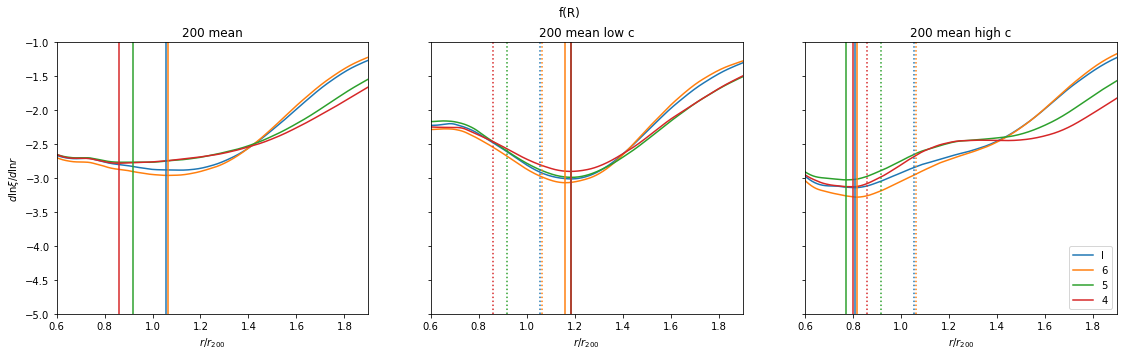

In [448]:
grafica4('200 mean',1,ol,o6,o5,o4,'200 mean low c',1,oll,ol6,ol5,ol4,'200 mean high c',1,ohl,oh6,oh5,oh4,0,0,0.6,1.9,-5,-1,0,0.9)

### overdensity 200: median and concentration

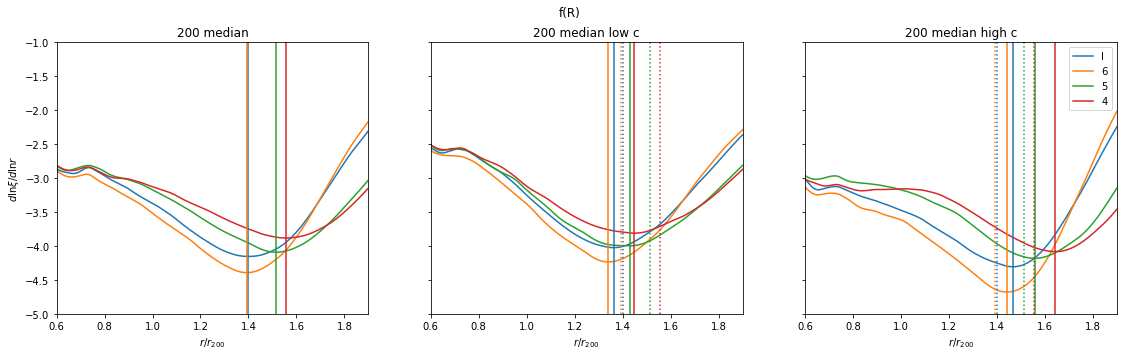

In [449]:
grafica4('200 median',1.4,oml,om6,om5,om4,'200 median low c',1.4,omll,oml6,oml5,oml4,'200 median high c',1.4,omhl,omh6,omh5,omh4,0,0,0.6,1.9,-5,-1,0,1.5)

### rockstar virial: mean and concentration

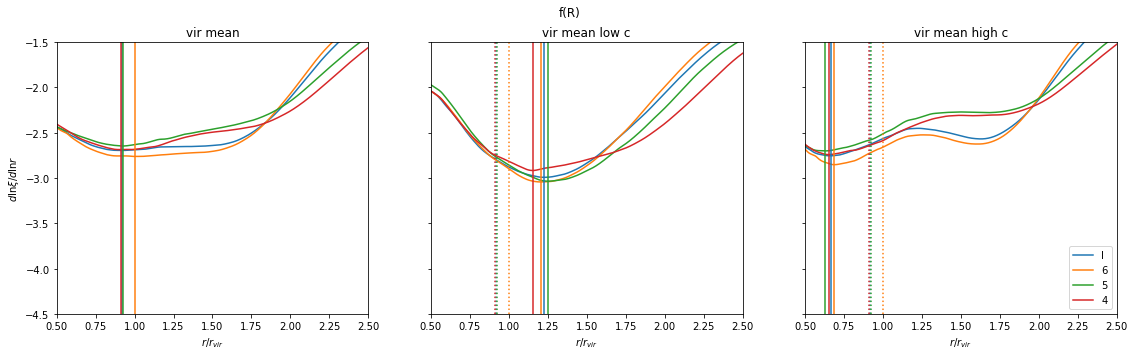

In [450]:
grafica4('virial mean',1,il,i6,i5,i4,'virial mean low c',1,ill,il6,il5,il4,'virial mean high c',1,ihl,ih6,ih5,ih4,0,0,0.5,2.5,-4.5,-1.5,1,1.)

### rockstar virial: median and concentration

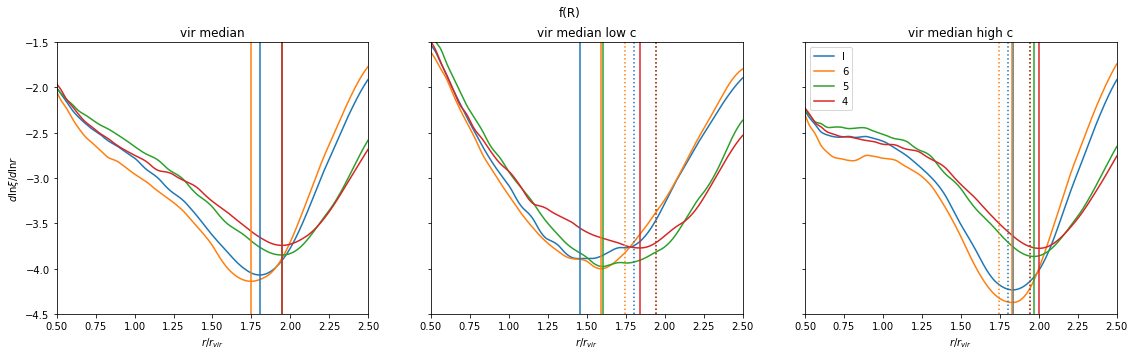

In [451]:
grafica4('virial median',1.8,iml,im6,im5,im4,'virial median low c',1.8,imll,iml6,iml5,iml4,'virial median high c',1.8,imhl,imh6,imh5,imh4,0,0,0.5,2.5,-4.5,-1.5,1,2.)

It seems like indeed the splashback radius depend on MG.
Other thing we can see is that it does not changes monotonically with the voids size.
Then, in order to have a better signal to noise ratio we sill stack all the voids together.
In fact, because we are going to use the median estimation of the density profile, we will make a bin of all the voids with enough particles.
















































# Symmetron

### mean vrs median

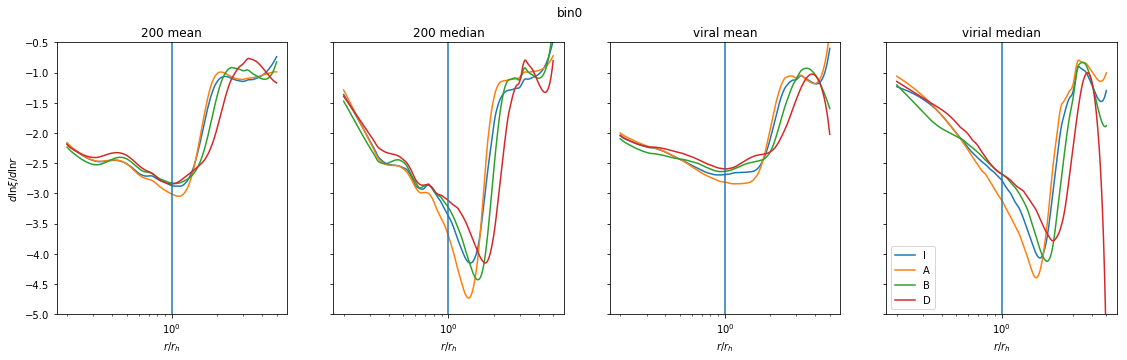

In [373]:
grafica3('200 mean',1,ol,oA,oB,oD,'200 median',1,oml,omA,omB,omD,'viral mean',1,il,iA,iB,iD,'virial median',1,iml,imA,imB,imD,1,0,-5)

### overdensity 200: mean and concentration

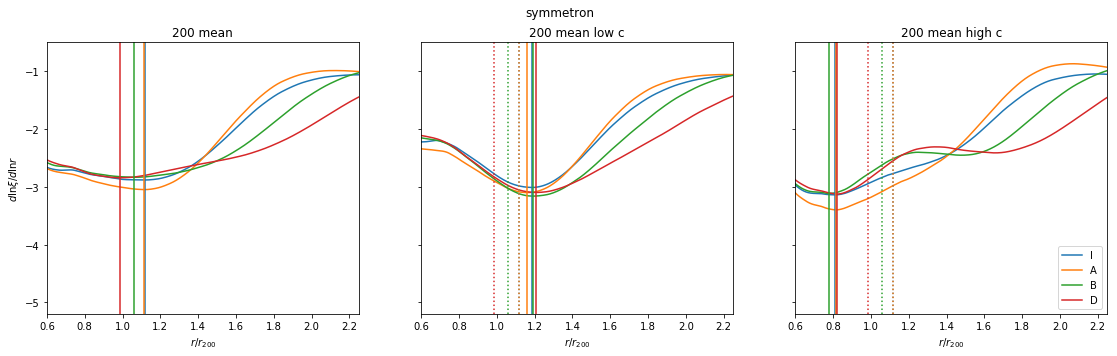

In [452]:
grafica4('200 mean',1,ol,oA,oB,oD,'200 mean low c',1,oll,olA,olB,olD,'200 mean high c',1,ohl,ohA,ohB,ohD,1,0,0.6,2.25,-5.2,-0.5,0,1.)

### overdensity 200: median and concentration

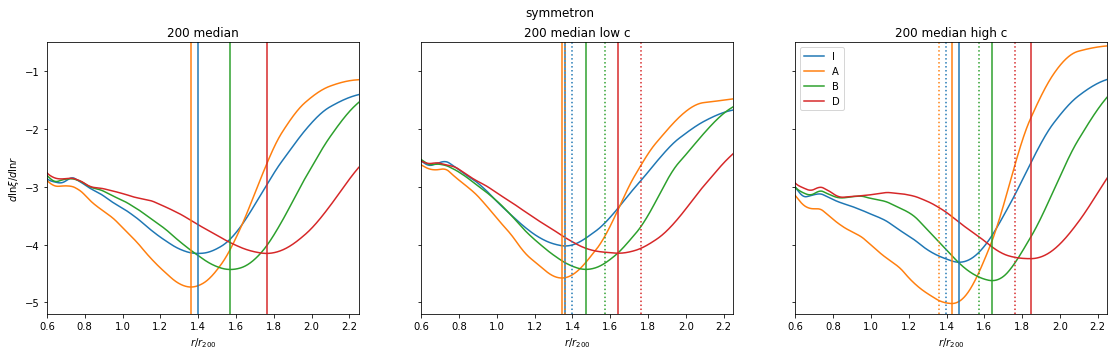

In [453]:
grafica4('200 median',1.4,oml,omA,omB,omD,'200 median low c',1.4,omll,omlA,omlB,omlD,'200 median high c',1.4,omhl,omhA,omhB,omhD,1,0,0.6,2.25,-5.2,-0.5,0,1.5)

### rockstar virial: mean and concentration

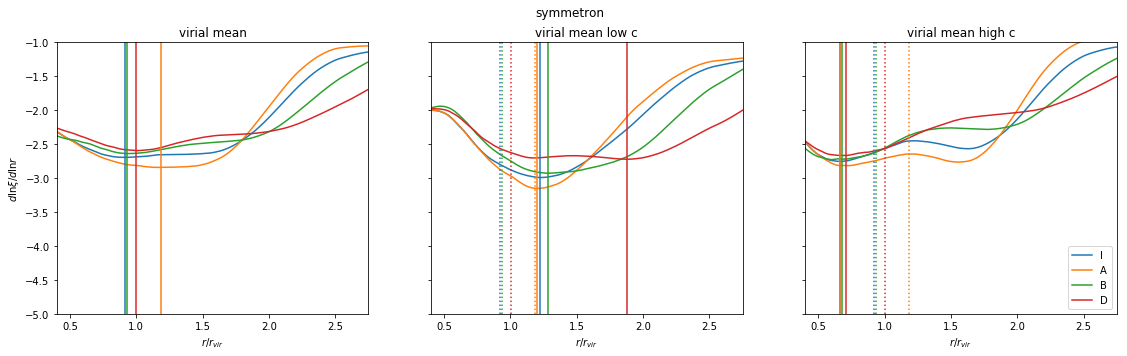

In [454]:
grafica4('virial mean',1,il,iA,iB,iD,'virial mean low c',1,ill,ilA,ilB,ilD,'virial mean high c',1,ihl,ihA,ihB,ihD,1,0,0.4,2.75,-5,-1,1,0.9)

### rockstar virial: median and concentration

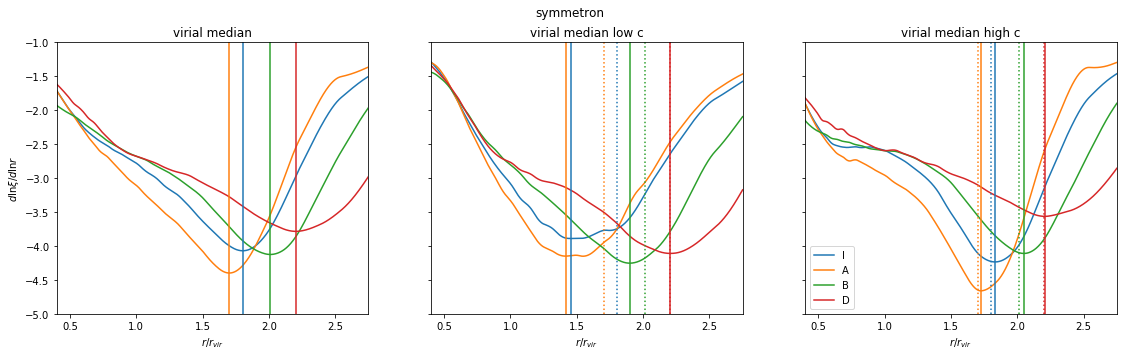

In [456]:
grafica4('virial median',1.8,iml,imA,imB,imD,'virial median low c',1.8,imll,imlA,imlB,imlD,'virial median high c',1.8,imhl,imhA,imhB,imhD,1,0,0.4,2.75,-5,-1,1,2.)

-65.217637958834018

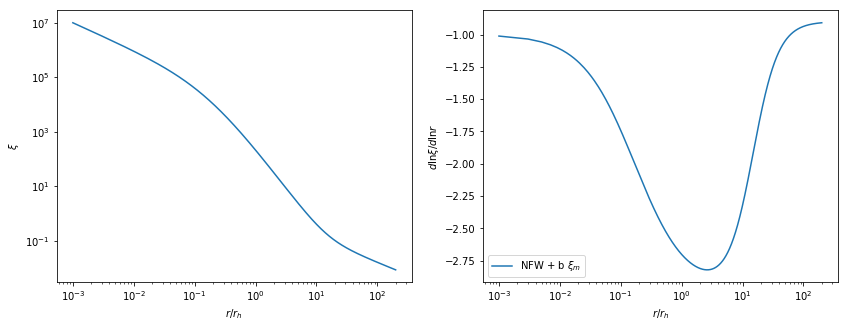

In [476]:
def f(x):
    r=x*5.9
    return 10000./(1.+r)**2/x + 1.*x**-0.9

x = np.linspace(0.001, 200, 100000)

plt.figure(figsize=(14, 5))

ax = plt.subplot(121)
plt.loglog(x, f(x), label='matter auto-correlation')
plt.ylabel(r'$\xi$')
plt.xlabel(r'$r/r_h$')
#plt.axvline(x=.5)

plt.subplot(122)
plt.semilogx(x, derivative(f, x, dx=1e-5)*x/f(x), label=r'NFW + b $\xi_m$')
plt.ylabel(r'$d \ln \xi / d \ln r$')
plt.xlabel(r'$r/r_h$')

#plt.title("Log derivative of the halo-matter correlation fuction")

plt.legend(loc=0)

plt.show()

In [135]:
import scipy
def fun(x):
    return (x-1.2)**2
scipy.optimize.minimize(fun,0.).x

array([ 1.19999999])

In [149]:
mini=scipy.optimize.minimize(fun,0.5).x

mini

In [150]:
mini

array([ 1.19999999])